All imports:

In [461]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

define helpful functions

In [462]:
def display_image(mat_like, cmap="rgb"):
    plt.figure()
    if cmap != "rgb":
        plt.imshow(mat_like, cmap=cmap)
    else:
        plt.imshow(mat_like)
    plt.show()
    plt.close()

In [463]:
kernel_size = 15
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

def erode(img, amount=1):
    for _ in range(amount):
        img = cv2.erode(img, kernel)

    return img


def dilate(img, amount=1):
    

    for _ in range(amount):
        img = cv2.dilate(img, kernel)

    return img


def clean_image(gray, display=False):
    gray = cv2.medianBlur(gray, 31) # blur
    if display:
        display_image(gray, "gray")
        
    gray = cv2.equalizeHist(gray) # equalize
    if display:
        display_image(gray, "gray")

    gray = 255 - gray # inverse
    if display:
        display_image(gray, "gray")
    
    # gray = cv2.medianBlur(gray, 31) # blue
    # gray = cv2.GaussianBlur(gray, (15, 15), 0)
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(13, 13))
    gray = clahe.apply(gray) # clahe
    if display:
        display_image(gray, "gray")
        
    # if display:
    #     display_image(gray, "gray")
    
    _, gray = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY) #threshold
    if display:
        display_image(gray, "gray")
    
    gray = dilate(gray, 2) # dilate
    if display:
        display_image(gray, "gray")
        
    gray = erode(gray, 7) # erode
    if display:
        display_image(gray, "gray")
        
    gray = dilate(gray, 7) # dilate
    if display:
        display_image(gray, "gray")

    return gray

In [464]:
def get_circles_from_gray(gray, color=None):
    gray = clean_image(gray)
    # display_image(gray, "gray")
    circles = cv2.HoughCircles(
        gray,
        cv2.HOUGH_GRADIENT,
        dp=1,  # down sample size
        minDist=500,  # minimum distance between detected circles
        param1=10,
        param2=14,
        minRadius=50,
        maxRadius=100,
    )

    if circles is None:
        print("no matches")
        return []

    color_img_cpy = np.copy(color)
    circles = np.uint(np.around(circles))
    circles = circles[0, :]
    
    if color is None:
        return circles

    for circle in circles:
        x, y, r = circle[0], circle[1], circle[2]
        cv2.circle(color_img_cpy, (x, y), r, (255, 255, 255), 15)
    # display_image(color_img_cpy)
    return circles


def merge_circle_arr(res, add):
    for circle_n in add:
        x_new, y_new, r_new = circle_n[0], circle_n[1], circle_n[2]
        for circle_o in res:
            x_old, y_old, r_old = circle_o[0], circle_o[1], circle_o[2]
            if math.dist((x_new, y_new), (x_old, y_old)) < 50:
                x_new = (x_new + x_old) / 2
                y_new = (y_new + y_old) / 2
                r_new = max(r_new, r_old)
                circle_o[0], circle_o[1], circle_o[2] = x_new, y_new, r_new
                r_new = -1
                break

        if r_new > 0:
            res.append(circle_n)
    


def get_circles(color, display=False):
    r, g, b = cv2.split(color)

    r_circles = get_circles_from_gray(r, color)
    g_circles = get_circles_from_gray(g, color)
    b_circles = get_circles_from_gray(b, color)

    result = []
    merge_circle_arr(result, r_circles)
    merge_circle_arr(result, g_circles)
    merge_circle_arr(result, b_circles)
    
    if not display:
        return result
    
    img_copy = np.copy(color)
    for circle in result:
        x, y, r = circle[0], circle[1], circle[2]
        cv2.circle(img_copy, (x, y), r, (255, 255, 255), 15)

    display_image(img_copy)
    return result

Load Image folders

In [465]:
current_folder = os.getcwd()
root_data_folder = os.path.join(current_folder, "local_data")
random_frames_folder = os.path.join(root_data_folder, "random_frames")
sequence_1_folder = os.path.join(root_data_folder, "sequence_1")
sequence_2_folder = os.path.join(root_data_folder, "sequence_2")
sequence_3_folder = os.path.join(root_data_folder, "sequence_3")
sequence_4_folder = os.path.join(root_data_folder, "sequence_4")

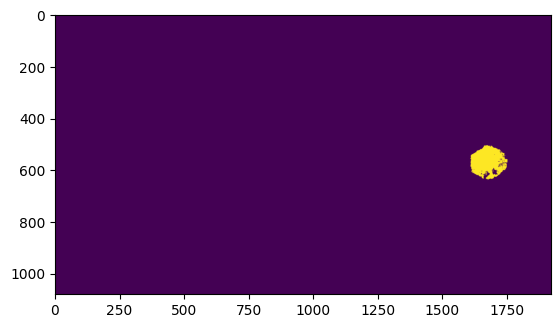

In [466]:
img_path = os.path.join(sequence_4_folder, "seq_005.jpg")

rnd_img = cv2.imread(img_path)
color_rgb = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2GRAY)

padding = 15

orange_ranges = [
    [[124, 80, 53],[131, 85, 54]],
    [[102, 98, 114],[104, 103, 127]],
    [[45, 81, 125],[48, 83, 131]],
]

low = np.array([c - padding for c in orange_ranges[0][0]], dtype=np.uint16)
high = np.array([c + padding for c in orange_ranges[0][1]], dtype=np.uint16)

res_img = cv2.inRange(color_rgb, low, high)
display_image(res_img)

load one image for testing

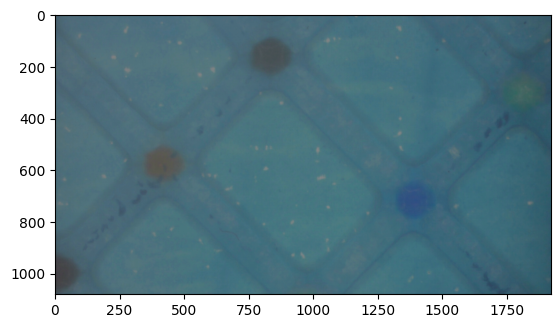

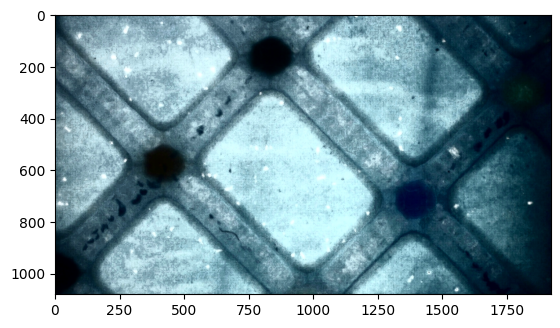

-1

In [473]:
img_path = os.path.join(random_frames_folder, "random_003.jpg")

rnd_img = cv2.imread(img_path)
color_rgb = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2GRAY)

padding = 10
orange_ranges = [
    [[124, 80, 45],[131, 85, 54]],
    [[114, 98, 102],[127, 103, 104]],
]

# low_orange_range = np.array([c - padding for c in orange_ranges[0][0]], dtype=np.uint16)
# high_orange_range = np.array([c + padding for c in orange_ranges[0][1]], dtype=np.uint16)

# res_img = cv2.inRange(color_rgb, low, high)
# display_image(res_img)



img_yuv = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

display_image(rnd_img)
display_image(img_output)

cv2.waitKey(0)

# def find_orange_circles(rgb_img):
#     rgb_img = cv2.equalizeHist(rgb_img) # blur
#     rgb_img = cv2.medianBlur(rgb_img, 31) # blur
#     display_image(rgb_img)
#     res_img = np.zeros(rgb_img.shape[:2])
    
#     for range in orange_ranges:
#         low_orange_range = np.array([c - padding for c in range[0]], dtype=np.uint16)
#         high_orange_range = np.array([c + padding for c in range[1]], dtype=np.uint16)
#         temp_res = cv2.inRange(rgb_img, low_orange_range, high_orange_range)
#         display_image(temp_res)

# find_orange_circles(color_rgb)

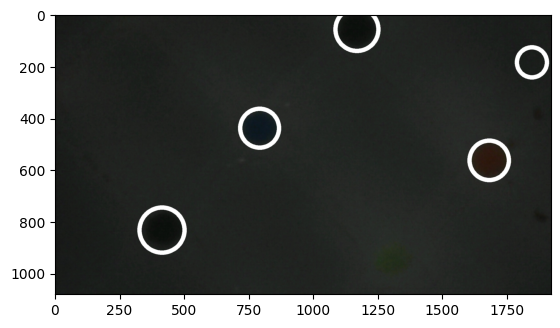

In [ ]:
img_path = os.path.join(sequence_4_folder, "seq_001.jpg")

rnd_img = cv2.imread(img_path)
color_rgb = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rnd_img, cv2.COLOR_BGR2GRAY)

circles = get_circles(color_rgb, True)


Average color (BGR): [12 16 12]


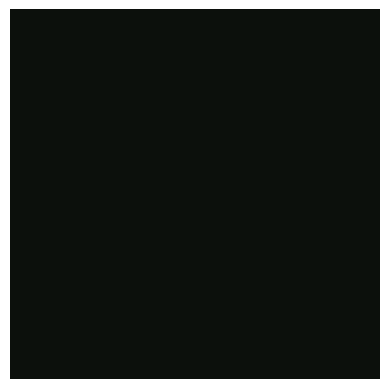

Average color (BGR): [27 30 27]


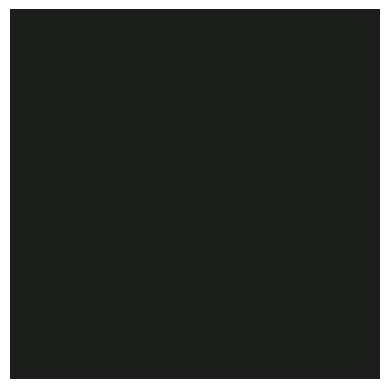

Average color (BGR): [12 16 13]


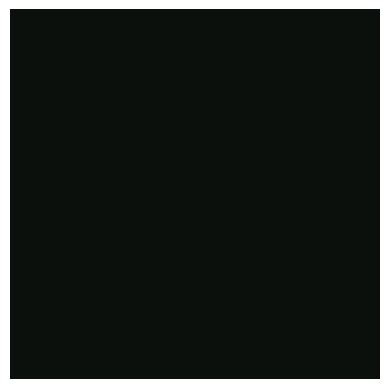

Average color (BGR): [13 24 32]


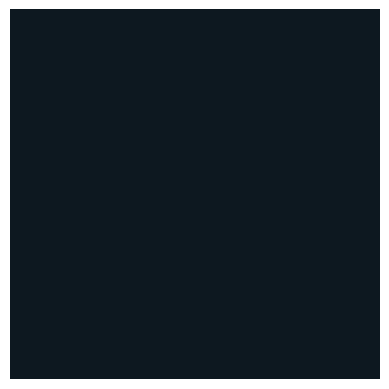

Average color (BGR): [44 24 14]


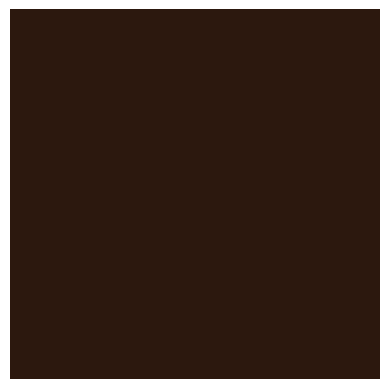

In [ ]:
def get_circle_color(color_img, circle):
    x, y, r = circle[0], circle[1], circle[2]
    
    mask = np.zeros(color_img.shape[:2], dtype=np.uint8)
    
    cv2.circle(mask, (x,y), r // 3, 255, thickness=-1)
    
    mean_color = cv2.mean(color_img, mask=mask)
    mean_color = np.uint(np.around(mean_color))
    
    print("Average color (BGR):", mean_color[:3])  
    
    return mean_color

for circle in circles:
    circle_bgr = get_circle_color(color_rgb, circle)[:3]
    circle_rgb = circle_bgr[::-1]
    
        # Define the RGB color (values between 0 and 1 for matplotlib)
    rgb_color = tuple(c/255 for c in circle_bgr)

    # Create an image filled with the color
    color_patch = np.ones((100, 100, 3)) * rgb_color

    # Display the color
    plt.imshow(color_patch)
    plt.axis("off")  # Hide axes
    plt.show()
    